***

# <center><font size="5" color='red'>Name: Muhammad Abdullah Shahid &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;ID: F2019027004</font></center>


# <center><font size="10" color='Blue'>Machine Learning </font></center>


# <center><font size="6" color='Blue'>Assignment 4 Task 2</font></center>

# <center><font size="5" color='green'>Feature Extraction Using Scikit-Learn’s implementation </font></center>

# <center><font size="6" > <i style=" color:#F0CD23">Stylometry Based methods </i></font></center>


***

#  <font color="Red" size=6> Step 1: Import Libraries </font>

In [1]:
import re
import os
import glob
import string
import scipy
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from prettytable import PrettyTable
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from gensim.parsing.preprocessing import remove_stopwords

#  <font color="Red" size=6> Step 2: Read, Understand and Pre-process Train/Test Data </font>

# <font color="green"> Read data from male corpus<font>
    We have some text file which contain some sample data and through these data we will train our model.
    So first we get data from all mail text file and store this data in a variable by using pandas labirary.
    And than we will analyze and do some preprocessing tasks on our train data and represent data through charts for better
    understanding.

In [2]:
male_corpus = []
for files in glob.glob('twitter-gender-corpus/male/*.txt'):
    f = open(files,encoding="utf8") 
    male_corpus.append(f.read())
    f.close()


In [3]:
len(male_corpus)

210

In [4]:
pd.options.display.max_colwidth = 150
male_df = pd.DataFrame(male_corpus,columns=['text'])
male_df

,text
0,"@zulahni Oh, honey. Don&#39;t force us to stage an intervention. Look at your life. Look at your choices. #sassygayfriend\n@BrianEnigma Re: ARG To..."
1,"@lukeniuk Tack män! Kul som fan att träffas!\nTack själv man, riktigt fett att få höra dig köra live! @MangeHellberg @Tigerboys @Imtherereasonwhy ..."
2,"Report from SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #conferencereports #crowdsourcing #gir\nPeter ..."
3,After quite some time working on different things: Running some experiments on content extraction from web documents again...\nmight be interesti...
4,Financial crisis hurting new job seekers in Japan http://www.yomiuri.co.jp/dy/business/20081111TDY04303.htm\nUS Students May Seek More Loans as Sa...
...,...
205,Should be interesting.http://fplus.me/p/f55&nbsp;\nConcept of owning something should include tinkering with it.http://fplus.me/p/flk&nbsp;\nhorro...
206,@R_Lukaku cannot wait to see you at chelsea! from a belgian ex-pat in london\n@farhanlalji it&#39;s unavoidable I guess after a while in Switzerla...
207,"Paid a visit to Lindum Colonia today, better known as Lincoln,the County may have been Gods afterthought to fill some space but the citys ok\n@_Gr..."
208,Viewing my find on #NearMap http://bit.ly/qjLvah&nbsp;\nMy latest SlideShare upload : Hunagi skopje http://slidesha.re/dJ7GWk\nHUNAGI Napló: http:...


## <center> <font color="blue"> Add label with male corpus </font> </center> 

In [5]:
male_df["gender"] = "male"
male_df

,text,gender
0,"@zulahni Oh, honey. Don&#39;t force us to stage an intervention. Look at your life. Look at your choices. #sassygayfriend\n@BrianEnigma Re: ARG To...",male
1,"@lukeniuk Tack män! Kul som fan att träffas!\nTack själv man, riktigt fett att få höra dig köra live! @MangeHellberg @Tigerboys @Imtherereasonwhy ...",male
2,"Report from SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #conferencereports #crowdsourcing #gir\nPeter ...",male
3,After quite some time working on different things: Running some experiments on content extraction from web documents again...\nmight be interesti...,male
4,Financial crisis hurting new job seekers in Japan http://www.yomiuri.co.jp/dy/business/20081111TDY04303.htm\nUS Students May Seek More Loans as Sa...,male
...,...,...
205,Should be interesting.http://fplus.me/p/f55&nbsp;\nConcept of owning something should include tinkering with it.http://fplus.me/p/flk&nbsp;\nhorro...,male
206,@R_Lukaku cannot wait to see you at chelsea! from a belgian ex-pat in london\n@farhanlalji it&#39;s unavoidable I guess after a while in Switzerla...,male
207,"Paid a visit to Lindum Colonia today, better known as Lincoln,the County may have been Gods afterthought to fill some space but the citys ok\n@_Gr...",male
208,Viewing my find on #NearMap http://bit.ly/qjLvah&nbsp;\nMy latest SlideShare upload : Hunagi skopje http://slidesha.re/dJ7GWk\nHUNAGI Napló: http:...,male


# <font color="green"> Read data from female corpus<font>

In [6]:
female_corpus = []

for files in glob.glob('twitter-gender-corpus/female/*.txt'):
    f = open(files,encoding="utf8") 
    female_corpus.append(f.read())
    f.close()

In [7]:
female_df = pd.DataFrame(female_corpus,columns=['text'])
female_df

,text
0,Inspiration juices for today #RussianCosmo #beauty #makeup http://instagr.am/p/RNNtiom7m4/&nbsp;\nBeautiful makeup with Beautiful #maria from #for...
1,"Getting ready for #AOM2011 (@ AOM 2011 Annual Meeting) http://4sq.com/o5iht8\nI love sessions with terms like MOO, MUD, MUSH and MUVE! Sitting in ..."
2,Social Influencers Who Are Changing The World Through Twitter http://www.fastcompany.com/node/3004155&nbsp; via @FastCompany\nLift a glass of wate...
3,Azure Monitor para Windows Phone 7 http://www.estoyenlanube.com/azure-monitor-para-windows-phone-7/&nbsp;…\nhttp://smlk.es/Gt7YCx&nbsp;\nCompleta ...
4,@inesbajo @goroji jajjajja! Lo sé! Gracias SF! :) a 20 min de ver a #Nuka! :)\nVer &quot;Emotional baby! Too cute!&quot; en YouTube - https://www...
...,...
210,@pablomoreiras Exacto ;-) @eEAmerica\nLo q me encanta d #Google RT @Alyssa_Milano: Google Doodle Honors 50th Anniversary of &#39;I Have a Dream&#3...
211,"&quot;Chance is like a picture, it&#39;d be nice if you&#39;d just take it.&quot;\nI&#39;m at The Juice Press (New York)http://4sq.com/oc64P0&nbsp..."
212,How to Recognize a Hipster - Your server has a full beard and is wearing a beanie. http://tumblr.com/xrn47n6ngy&nbsp;\nGloria Ferrera Blanc de Bla...
213,"@rigbysdeli thanks so much! Info sent\nA moto for work, pals and play. Doodle by @dineensparish http://instagram.com/p/afzwlgxT94/&nbsp;\nyou know..."


## <center> <font color="blue"> Add label with female corpus </font> </center> 

In [8]:
female_df["gender"] = "female"
female_df

,text,gender
0,Inspiration juices for today #RussianCosmo #beauty #makeup http://instagr.am/p/RNNtiom7m4/&nbsp;\nBeautiful makeup with Beautiful #maria from #for...,female
1,"Getting ready for #AOM2011 (@ AOM 2011 Annual Meeting) http://4sq.com/o5iht8\nI love sessions with terms like MOO, MUD, MUSH and MUVE! Sitting in ...",female
2,Social Influencers Who Are Changing The World Through Twitter http://www.fastcompany.com/node/3004155&nbsp; via @FastCompany\nLift a glass of wate...,female
3,Azure Monitor para Windows Phone 7 http://www.estoyenlanube.com/azure-monitor-para-windows-phone-7/&nbsp;…\nhttp://smlk.es/Gt7YCx&nbsp;\nCompleta ...,female
4,@inesbajo @goroji jajjajja! Lo sé! Gracias SF! :) a 20 min de ver a #Nuka! :)\nVer &quot;Emotional baby! Too cute!&quot; en YouTube - https://www...,female
...,...,...
210,@pablomoreiras Exacto ;-) @eEAmerica\nLo q me encanta d #Google RT @Alyssa_Milano: Google Doodle Honors 50th Anniversary of &#39;I Have a Dream&#3...,female
211,"&quot;Chance is like a picture, it&#39;d be nice if you&#39;d just take it.&quot;\nI&#39;m at The Juice Press (New York)http://4sq.com/oc64P0&nbsp...",female
212,How to Recognize a Hipster - Your server has a full beard and is wearing a beanie. http://tumblr.com/xrn47n6ngy&nbsp;\nGloria Ferrera Blanc de Bla...,female
213,"@rigbysdeli thanks so much! Info sent\nA moto for work, pals and play. Doodle by @dineensparish http://instagram.com/p/afzwlgxT94/&nbsp;\nyou know...",female


## <center> <font color="blue"> Combile Male and Female Corpus </font> </center> 

In [9]:
twitterCorpus_df = male_df.append(female_df, ignore_index= True)
twitterCorpus_df

,text,gender
0,"@zulahni Oh, honey. Don&#39;t force us to stage an intervention. Look at your life. Look at your choices. #sassygayfriend\n@BrianEnigma Re: ARG To...",male
1,"@lukeniuk Tack män! Kul som fan att träffas!\nTack själv man, riktigt fett att få höra dig köra live! @MangeHellberg @Tigerboys @Imtherereasonwhy ...",male
2,"Report from SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #conferencereports #crowdsourcing #gir\nPeter ...",male
3,After quite some time working on different things: Running some experiments on content extraction from web documents again...\nmight be interesti...,male
4,Financial crisis hurting new job seekers in Japan http://www.yomiuri.co.jp/dy/business/20081111TDY04303.htm\nUS Students May Seek More Loans as Sa...,male
...,...,...
420,@pablomoreiras Exacto ;-) @eEAmerica\nLo q me encanta d #Google RT @Alyssa_Milano: Google Doodle Honors 50th Anniversary of &#39;I Have a Dream&#3...,female
421,"&quot;Chance is like a picture, it&#39;d be nice if you&#39;d just take it.&quot;\nI&#39;m at The Juice Press (New York)http://4sq.com/oc64P0&nbsp...",female
422,How to Recognize a Hipster - Your server has a full beard and is wearing a beanie. http://tumblr.com/xrn47n6ngy&nbsp;\nGloria Ferrera Blanc de Bla...,female
423,"@rigbysdeli thanks so much! Info sent\nA moto for work, pals and play. Doodle by @dineensparish http://instagram.com/p/afzwlgxT94/&nbsp;\nyou know...",female


# <font color="green"> Understand data with different ways<font>

In [10]:
pd.options.display.max_colwidth = 50
twitterCorpus_df.info

<bound method DataFrame.info of                                                   text  gender
0    @zulahni Oh, honey. Don&#39;t force us to stag...    male
1    @lukeniuk Tack män! Kul som fan att träffas!\n...    male
2    Report from SIGIR 2011 (Beijing, China) - http...    male
3    After quite some time working on different thi...    male
4    Financial crisis hurting new job seekers in Ja...    male
..                                                 ...     ...
420  @pablomoreiras Exacto ;-) @eEAmerica\nLo q me ...  female
421  &quot;Chance is like a picture, it&#39;d be ni...  female
422  How to Recognize a Hipster - Your server has a...  female
423  @rigbysdeli thanks so much! Info sent\nA moto ...  female
424  FF @Wolfhack\nFF @Wolfhack =)\n#FF A mi top 3 ...  female

[425 rows x 2 columns]>

In [11]:
twitterCorpus_df.columns


Index(['text', 'gender'], dtype='object')

In [12]:
twitterCorpus_df.shape

(425, 2)

In [13]:
pd.DataFrame( [
            len(twitterCorpus_df[twitterCorpus_df.gender.isin(['male'])]),
            len(twitterCorpus_df[twitterCorpus_df.gender.isin(['female'])])
    ], index=["Male", "Female"])

,0
Male,210
Female,215


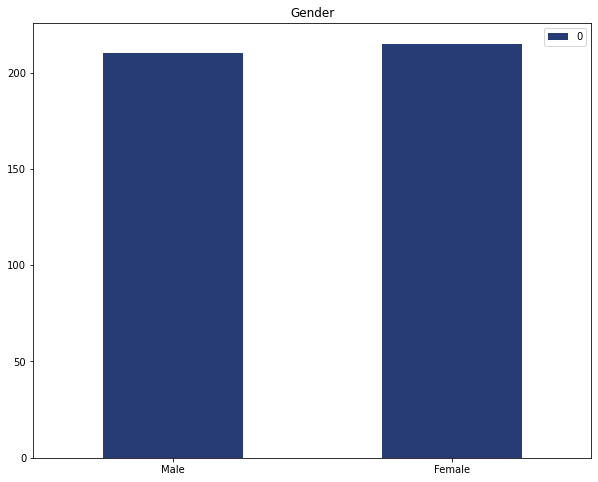

In [14]:
pd.DataFrame( [
            len(twitterCorpus_df[twitterCorpus_df.gender.isin(['male'])]),
            len(twitterCorpus_df[twitterCorpus_df.gender.isin(['female'])])
    ], index=["Male", "Female"]).plot.bar(rot=0 ,title="Gender", figsize=(10, 8) , color=["#273c75"]);

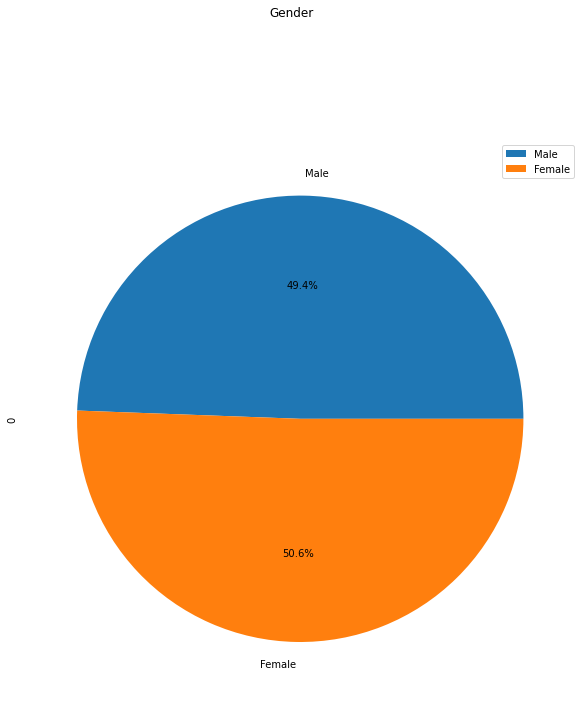

In [15]:
pd.DataFrame( [
            len(twitterCorpus_df[twitterCorpus_df.gender.isin(['male'])]),
            len(twitterCorpus_df[twitterCorpus_df.gender.isin(['female'])])
    ], index=["Male", "Female"]).plot.pie(subplots=True, figsize=(10, 12), autopct='%1.1f%%', title="Gender");

# <font color="green"> Pre-process on all data <font>


In [16]:
pd.options.display.max_colwidth = 150
twitterCorpus_df

,text,gender
0,"@zulahni Oh, honey. Don&#39;t force us to stage an intervention. Look at your life. Look at your choices. #sassygayfriend\n@BrianEnigma Re: ARG To...",male
1,"@lukeniuk Tack män! Kul som fan att träffas!\nTack själv man, riktigt fett att få höra dig köra live! @MangeHellberg @Tigerboys @Imtherereasonwhy ...",male
2,"Report from SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #conferencereports #crowdsourcing #gir\nPeter ...",male
3,After quite some time working on different things: Running some experiments on content extraction from web documents again...\nmight be interesti...,male
4,Financial crisis hurting new job seekers in Japan http://www.yomiuri.co.jp/dy/business/20081111TDY04303.htm\nUS Students May Seek More Loans as Sa...,male
...,...,...
420,@pablomoreiras Exacto ;-) @eEAmerica\nLo q me encanta d #Google RT @Alyssa_Milano: Google Doodle Honors 50th Anniversary of &#39;I Have a Dream&#3...,female
421,"&quot;Chance is like a picture, it&#39;d be nice if you&#39;d just take it.&quot;\nI&#39;m at The Juice Press (New York)http://4sq.com/oc64P0&nbsp...",female
422,How to Recognize a Hipster - Your server has a full beard and is wearing a beanie. http://tumblr.com/xrn47n6ngy&nbsp;\nGloria Ferrera Blanc de Bla...,female
423,"@rigbysdeli thanks so much! Info sent\nA moto for work, pals and play. Doodle by @dineensparish http://instagram.com/p/afzwlgxT94/&nbsp;\nyou know...",female


## <center> <font color="blue"> Remove stopWords </font> </center> 

In [17]:
# Remove stopWords
twitterCorpus_df.text = twitterCorpus_df.text.map( lambda x: remove_stopwords(x))
twitterCorpus_df

,text,gender
0,"@zulahni Oh, honey. Don&#39;t force stage intervention. Look life. Look choices. #sassygayfriend @BrianEnigma Re: ARG Tools 2.1: bad news, HTML en...",male
1,"@lukeniuk Tack män! Kul som fan att träffas! Tack själv man, riktigt fett att få höra dig köra live! @MangeHellberg @Tigerboys @Imtherereasonwhy @...",male
2,"Report SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #conferencereports #crowdsourcing #gir Peter Jackson...",male
3,After time working different things: Running experiments content extraction web documents again... interesting @arifah77 RT @danielequercia: RT @L...,male
4,Financial crisis hurting new job seekers Japan http://www.yomiuri.co.jp/dy/business/20081111TDY04303.htm US Students May Seek More Loans Savings D...,male
...,...,...
420,@pablomoreiras Exacto ;-) @eEAmerica Lo q encanta d #Google RT @Alyssa_Milano: Google Doodle Honors 50th Anniversary &#39;I Have Dream&#39; http:/...,female
421,"&quot;Chance like picture, it&#39;d nice you&#39;d it.&quot; I&#39;m The Juice Press (New York)http://4sq.com/oc64P0&nbsp; It&#39;s majorly produc...",female
422,How Recognize Hipster - Your server beard wearing beanie. http://tumblr.com/xrn47n6ngy&nbsp; Gloria Ferrera Blanc Blancs - In glass: - Color: Crea...,female
423,"@rigbysdeli thanks much! Info sent A moto work, pals play. Doodle @dineensparish http://instagram.com/p/afzwlgxT94/&nbsp; know having days think h...",female


#  <font color="Red" size=6> Step 3: Label Encoding for Train/Test Data </font>



In [18]:
pd.options.display.max_colwidth = 100
twitterCorpus_le_df = twitterCorpus_df.copy()
twitterCorpus_le_df

,text,gender
0,"@zulahni Oh, honey. Don&#39;t force stage intervention. Look life. Look choices. #sassygayfriend...",male
1,"@lukeniuk Tack män! Kul som fan att träffas! Tack själv man, riktigt fett att få höra dig köra l...",male
2,"Report SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #c...",male
3,After time working different things: Running experiments content extraction web documents again....,male
4,Financial crisis hurting new job seekers Japan http://www.yomiuri.co.jp/dy/business/20081111TDY0...,male
...,...,...
420,@pablomoreiras Exacto ;-) @eEAmerica Lo q encanta d #Google RT @Alyssa_Milano: Google Doodle Hon...,female
421,"&quot;Chance like picture, it&#39;d nice you&#39;d it.&quot; I&#39;m The Juice Press (New York)h...",female
422,How Recognize Hipster - Your server beard wearing beanie. http://tumblr.com/xrn47n6ngy&nbsp; Glo...,female
423,"@rigbysdeli thanks much! Info sent A moto work, pals play. Doodle @dineensparish http://instagra...",female


In [19]:
leGender = LabelEncoder()

twitterCorpus_le_df['genderEncode'] = leGender.fit_transform(twitterCorpus_le_df['gender'])
twitterCorpus_le_df

,text,gender,genderEncode
0,"@zulahni Oh, honey. Don&#39;t force stage intervention. Look life. Look choices. #sassygayfriend...",male,1
1,"@lukeniuk Tack män! Kul som fan att träffas! Tack själv man, riktigt fett att få höra dig köra l...",male,1
2,"Report SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #c...",male,1
3,After time working different things: Running experiments content extraction web documents again....,male,1
4,Financial crisis hurting new job seekers Japan http://www.yomiuri.co.jp/dy/business/20081111TDY0...,male,1
...,...,...,...
420,@pablomoreiras Exacto ;-) @eEAmerica Lo q encanta d #Google RT @Alyssa_Milano: Google Doodle Hon...,female,0
421,"&quot;Chance like picture, it&#39;d nice you&#39;d it.&quot; I&#39;m The Juice Press (New York)h...",female,0
422,How Recognize Hipster - Your server beard wearing beanie. http://tumblr.com/xrn47n6ngy&nbsp; Glo...,female,0
423,"@rigbysdeli thanks much! Info sent A moto work, pals play. Doodle @dineensparish http://instagra...",female,0


#  <font color="Red" size=6> Step 4: Feature Extraction </font>

# <center> <font color="green" size=6> <i style=" color:#F0CD23">Stylometry Based Methods </i> </font> </center>

Write a script to automatically extract following 20 stylometery based features from the PAN- AP-16 Twitter Corpus.

1.	Commas
2.	full stop
3.	@
4.	(
5.	 )
6.	 !
7.	 –
8.	 ?
9.	 %
10.	 &
11.	 #
12.	 _
13.	 =
14.	capital Letters
15.	semi colons
16.	colons
17.	spaces
18.	SmallLetters
19.	/
20.	digits

#  <center> <font color="blue"> Create Method for automatically extract following 20 stylometery </font> </center>


In [20]:
def stylometeryFunction(txt):
    
    temp = {'digits': 0, 'capitalLetters': 0, 'smallLetters': 0, 'semiColons': 0, 
       'colons': 0, 'spaces': 0,  'fullStop': 0, 'commas': 0, '@': 0, 
       '!': 0, '–': 0, '?': 0, '%': 0, '&': 0, '#': 0, '_': 0, '=': 0, '/': 0, ')': 0, '(': 0}
    
    #1. Number of digits 
    temp['digits'] = sum(1 for c in txt if c.isdigit())
    
    

    #2. Number of capitalLetters
    temp['capitalLetters']= sum(1 for c in txt if c.isupper())


    #3. Number of smallLetters
    temp['smallLetters'] = sum(1 for c in txt if c.islower())


    #4. Number of semiColons 
    temp['semiColons'] = txt.count(';')


    #5. Number of colons 
    temp['colons'] = txt.count(':')


    #6. Number of spaces
    temp['spaces'] = txt.count(' ')


    #7. Number of fullstop 
    temp['fullStop'] = txt.count('.')


    #8. Number of commas
    temp['commas'] = txt.count(',')


    #9. Number of @ 
    temp['@'] = txt.count('@')


    #10. Number of ! 
    temp['!'] = txt.count('!')


    #11. Number of – 
    temp['–'] = txt.count('-')


    #12. Number of ?
    temp['?'] = txt.count('?')


    #13. Number of % 
    temp['%'] = txt.count('%')


    #14. Number of & 
    temp['&'] = txt.count('&')


    #15. Number of # 
    temp['#'] = txt.count('#')


    #16. Number of _ 
    temp['_'] = txt.count('_')


    #17. Number of = 
    temp['='] = txt.count('=')


    #18. Number of forward slash (/) 
    temp['/'] = txt.count('/')


    #19. Number of ) 
    temp[')'] = txt.count(')')


    #20. Number of ( 
    temp['('] = txt.count('(')


    return temp



#  <center> <font color="blue"> Extract 20 stylometery based feature </font> </center>

In [21]:
stylometery_df = []
for index, row in twitterCorpus_le_df.iterrows():
    stylometery_df.append(stylometeryFunction(row['text']))

stylometery_df = pd.DataFrame(stylometery_df)
stylometery_df['gender'] = twitterCorpus_le_df.gender
stylometery_df['genderEncode'] = twitterCorpus_le_df.genderEncode

stylometery_df

,digits,capitalLetters,smallLetters,semiColons,colons,spaces,fullStop,commas,@,!,...,%,&,#,_,=,/,),(,gender,genderEncode
0,2322,7525,52907,1214,686,9360,1590,515,805,331,...,3,1168,846,46,23,1180,284,143,male,1
1,1077,4928,57942,445,272,11779,872,605,1256,1184,...,8,412,291,173,9,307,175,27,male,1
2,2804,7319,73634,941,1191,11072,1429,339,94,46,...,11,922,3350,22,46,2672,200,191,male,1
3,1795,2504,38768,327,348,6450,512,187,195,89,...,6,292,582,31,6,278,130,88,male,1
4,3598,6254,50972,380,851,7102,1495,125,66,81,...,15,379,131,95,89,2499,17,15,male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,350,1150,10292,308,82,1849,324,56,322,80,...,4,112,62,42,14,178,230,8,female,0
421,2127,5702,48383,963,522,8326,1355,283,750,328,...,1,963,1027,189,44,1524,139,92,female,0
422,1236,3250,25008,466,406,3493,804,208,46,222,...,6,466,334,78,150,996,62,66,female,0
423,2535,5198,66762,854,512,9966,1287,203,852,251,...,51,846,917,263,89,1625,94,83,female,0


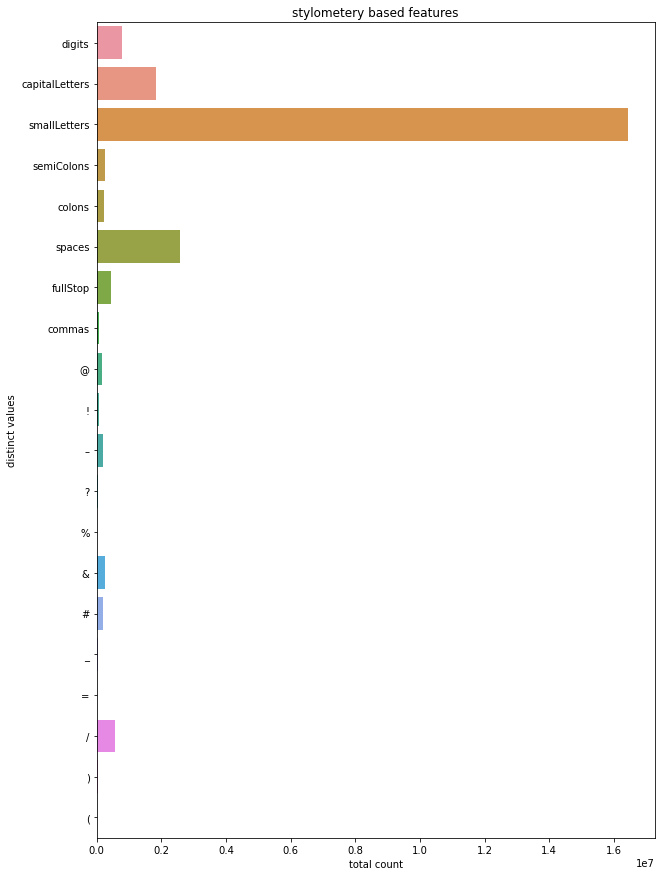

In [22]:
#stylometery_df.iloc[:,:20].sum(axis = 0, skipna = True).plot.barh(figsize=(20, 50));

graph_df = stylometery_df.iloc[:,:20].sum(axis = 0, skipna = True)
graph_df = { 'index': graph_df.index, 'value':graph_df.values }

graph_df = pd.DataFrame(graph_df)



fig = plt.figure(figsize=(10,15))
bar_plot = sns.barplot(y=graph_df['index'],
                       x=graph_df["value"])

plt.ylabel('distinct values')
plt.xlabel('total count')
plt.title("stylometery based features");


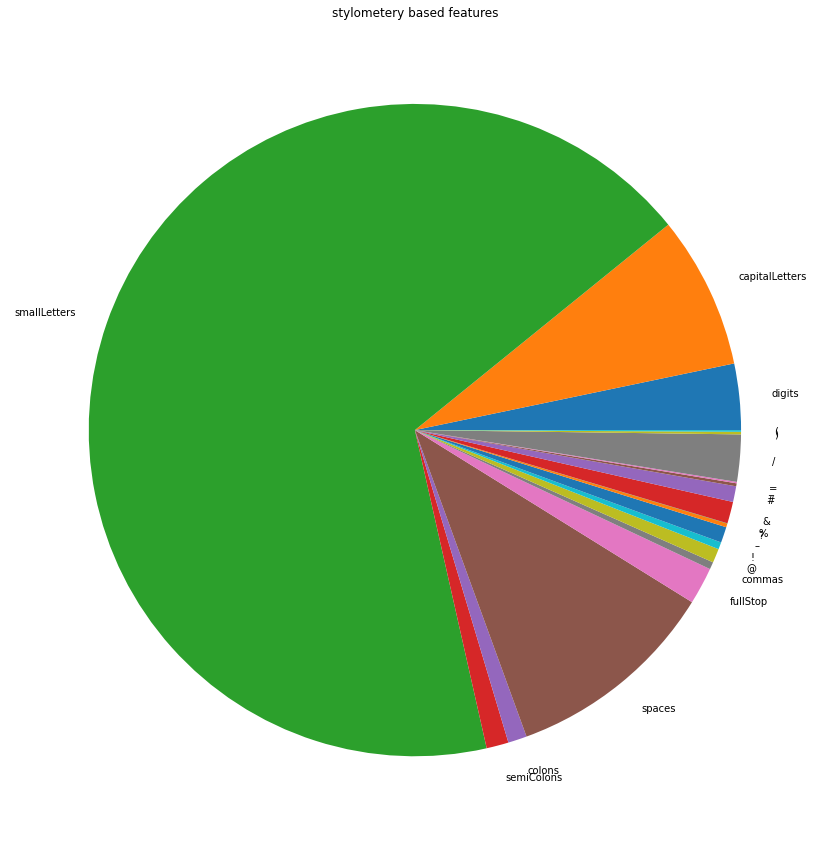

In [23]:
plt.figure(figsize=(15,15))
plt.title('stylometery based features')
plt.pie(graph_df.value, labels= graph_df['index'],  startangle=0);


#  <font color="Red" size=6> Step 5 and 6: Train ML Algorithms and Evaluate ML Algorithms </font>

# <center> <font color="blue"> Split train and test data  </font> </center>

In [24]:
trainData_input, testData_input, trainData_output, testData_output = train_test_split(
                                                                                        stylometery_df.iloc[:,:20],
                                                                                        stylometery_df.iloc[:,21],
                                                                                        test_size=0.33,
                                                                                        random_state=42
                                                                                        )

##  Train Data Input  

In [25]:
trainData_input

,digits,capitalLetters,smallLetters,semiColons,colons,spaces,fullStop,commas,@,!,–,?,%,&,#,_,=,/,),(
109,2952,3660,45480,698,654,6531,1320,336,376,160,888,128,4,668,420,58,56,1556,246,136
181,3747,3930,47700,443,403,7477,1109,169,393,105,574,82,8,429,484,11,1113,1984,27,20
194,3035,4587,52893,1322,444,8158,1568,278,297,280,515,341,4,1318,1529,84,58,1057,14,8
387,1858,5306,43127,495,385,7187,1423,233,750,224,274,139,6,479,530,137,28,723,22,19
168,972,1778,20387,263,216,2623,481,47,148,89,303,45,6,261,212,41,25,775,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,796,1258,17736,170,196,2631,362,44,222,60,192,74,16,170,122,28,26,570,32,28
106,3022,10673,55273,1231,865,9977,2895,241,382,776,398,107,10,1210,1096,111,26,2144,30,38
270,3168,6690,42482,782,696,8435,1224,402,296,976,364,122,14,774,520,60,50,1676,456,334
348,716,1604,12294,294,266,1699,400,10,110,38,108,26,0,292,168,26,50,788,22,18


##  Train Data Output

In [26]:
trainData_output

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: genderEncode, Length: 284, dtype: int32

##  Test Data Input  

In [27]:
testData_input

,digits,capitalLetters,smallLetters,semiColons,colons,spaces,fullStop,commas,@,!,–,?,%,&,#,_,=,/,),(
417,554,3210,13914,280,296,1735,328,12,196,6,240,28,0,274,132,18,18,798,12,2
75,2119,4266,57339,793,406,8632,1046,484,889,48,832,243,8,792,426,100,66,1444,9,5
176,1869,18813,79858,2307,2403,14876,3146,254,3,1,880,3,0,2307,22,0,0,3149,161,177
30,1034,5028,43892,748,794,6439,714,116,482,484,186,70,0,732,448,72,12,1878,38,14
357,415,1122,10954,202,103,1787,480,103,47,103,58,11,0,196,84,1,3,308,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,424,1618,13250,376,232,2061,234,32,100,6,70,14,4,376,216,10,2,566,20,14
312,218,5526,1694,102,88,1319,280,4,2,594,10,10,0,102,4,2,2,264,0,0
342,1364,2452,39534,337,352,7049,491,219,343,680,154,138,25,331,207,48,72,751,62,36
152,3430,7302,52128,1370,1109,8306,1453,347,481,252,577,85,1,1277,816,103,25,2328,493,387


##  Test Data Output

In [28]:
testData_output

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: genderEncode, Length: 141, dtype: int32

## <center> <font color="blue"> Create a DataFrame to store all models Pridiction by all feature vactor </font> </center> 

In [29]:
prediction = pd.DataFrame(columns=['Model Name', 'Accuracy', 'Error'])
prediction

,Model Name,Accuracy,Error


## <center> <font color="blue"> Train 6 different ML Algorithms and store their prediction in a dataframe  </font> </center>

In [30]:
    new_row = { }


    # train and predict from Model 1
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier()
    rfc.fit(trainData_input ,trainData_output)
    predict = rfc.predict(testData_input)

    new_row['Model Name'] = 'RandomForestClassifier'
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)




    # train and predict from Model 2
    from sklearn.naive_bayes import BernoulliNB
    bnb = BernoulliNB()
    bnb.fit(trainData_input ,trainData_output)
    predict = bnb.predict(testData_input)

    new_row['Model Name'] = 'BernoulliNB'
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)




    # train and predict from Model 3
    from sklearn.tree import ExtraTreeClassifier
    extTC = ExtraTreeClassifier()
    extTC.fit(trainData_input ,trainData_output)
    predict = extTC.predict(testData_input)

    new_row['Model Name'] = 'ExtraTreeClassifier'
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)




    # train and predict from Model 4
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(trainData_input ,trainData_output)
    predict = gnb.predict(testData_input)

    new_row['Model Name'] = 'GaussianNB'
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)



    # train and predict from Model 5
    from sklearn.linear_model import RidgeClassifierCV
    ridcCV = RidgeClassifierCV()
    ridcCV.fit(trainData_input ,trainData_output)
    predict = ridcCV.predict(testData_input)
    
    new_row['Model Name'] = 'RidgeClassifierCV'
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)



    # train and predict from Model 5
    from sklearn.linear_model import RidgeClassifier
    ridcCV = RidgeClassifierCV()
    ridcCV.fit(trainData_input ,trainData_output)
    predict = ridcCV.predict(testData_input)

    new_row['Model Name'] = 'RidgeClassifier'
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)
    
    prediction = prediction.append(new_row, ignore_index=True)
    

#  <font color="Red" size=6> Step 7: Selection of Best Model </font>

In [31]:
prediction.shape

(6, 3)

In [32]:
from tabulate import tabulate

prediction = prediction.convert_dtypes()
prediction_table = prediction.copy()
prediction_table = prediction_table.sort_values(by=['Accuracy'], ascending=False)
prediction_table = prediction_table.reset_index(drop=True)
prediction_table.index += 1 
prediction_table.Accuracy = prediction_table.Accuracy.astype(str) + '%'
prediction_table.Error = prediction_table.Error.astype(str) + '%'

print(tabulate(prediction_table, headers='keys', tablefmt='psql'))


+----+------------------------+------------+---------+
|    | Model Name             | Accuracy   | Error   |
|----+------------------------+------------+---------|
|  1 | RandomForestClassifier | 65%        | 34%     |
|  2 | RidgeClassifierCV      | 62%        | 37%     |
|  3 | RidgeClassifier        | 62%        | 37%     |
|  4 | ExtraTreeClassifier    | 56%        | 43%     |
|  5 | GaussianNB             | 55%        | 44%     |
|  6 | BernoulliNB            | 53%        | 46%     |
+----+------------------------+------------+---------+


# <center> <font color="blue"> Show model perfomance through graphs </font> </center>

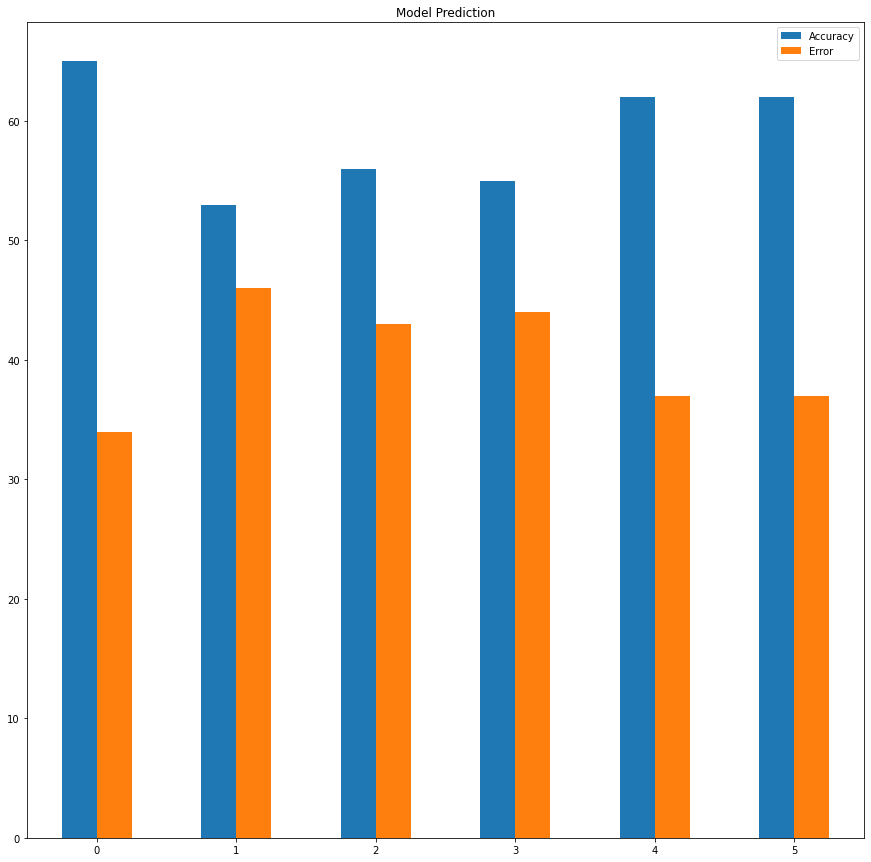

In [33]:
prediction.plot.bar(rot=0 ,title="Model Prediction", figsize=(15, 15));


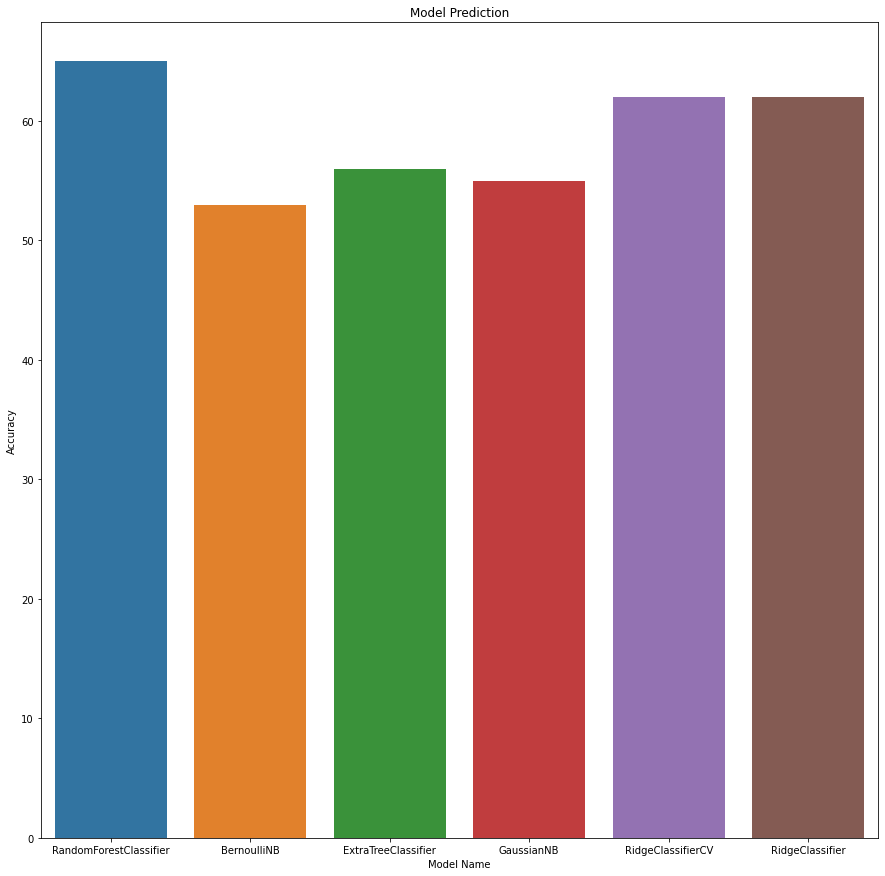

In [34]:
fig = plt.figure(figsize=(15,15))
bar_plot = sns.barplot(y=prediction.Accuracy, x=prediction["Model Name"])

# for item in bar_plot.get_xticklabels():
#     item.set_rotation(90)

#plt.xticks(rotation=180, ha='right')
#plt.xticks(rotation='horizontal')
plt.title("Model Prediction");


# <center> <font color="blue"> Best Model </font> </center>

In [35]:
print("\n\t\t\t\tAll Models Predictions\n")
print(tabulate(prediction_table, headers='keys', tablefmt='psql'))
print("\n\n\t\t\t\tBest Model\n")
print(tabulate(prediction[prediction.Accuracy == prediction.Accuracy.max()], headers='keys', tablefmt='psql'))



				All Models Predictions

+----+------------------------+------------+---------+
|    | Model Name             | Accuracy   | Error   |
|----+------------------------+------------+---------|
|  1 | RandomForestClassifier | 65%        | 34%     |
|  2 | RidgeClassifierCV      | 62%        | 37%     |
|  3 | RidgeClassifier        | 62%        | 37%     |
|  4 | ExtraTreeClassifier    | 56%        | 43%     |
|  5 | GaussianNB             | 55%        | 44%     |
|  6 | BernoulliNB            | 53%        | 46%     |
+----+------------------------+------------+---------+


				Best Model

+----+------------------------+------------+---------+
|    | Model Name             |   Accuracy |   Error |
|----+------------------------+------------+---------|
|  0 | RandomForestClassifier |         65 |      34 |
+----+------------------------+------------+---------+


#  <font color="Red" size=6> Step 8: Application Phase </font>


# <center> <font color="blue"> Combine all data and train best model on all data </font> </center>

In [36]:
del twitterCorpus_le_df['gender']
print("\nCombine Train Data Input:")
stylometery_df.iloc[:,:20]


Combine Train Data Input:


,digits,capitalLetters,smallLetters,semiColons,colons,spaces,fullStop,commas,@,!,–,?,%,&,#,_,=,/,),(
0,2322,7525,52907,1214,686,9360,1590,515,805,331,294,205,3,1168,846,46,23,1180,284,143
1,1077,4928,57942,445,272,11779,872,605,1256,1184,265,442,8,412,291,173,9,307,175,27
2,2804,7319,73634,941,1191,11072,1429,339,94,46,961,106,11,922,3350,22,46,2672,200,191
3,1795,2504,38768,327,348,6450,512,187,195,89,345,70,6,292,582,31,6,278,130,88
4,3598,6254,50972,380,851,7102,1495,125,66,81,858,125,15,379,131,95,89,2499,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,350,1150,10292,308,82,1849,324,56,322,80,256,12,4,112,62,42,14,178,230,8
421,2127,5702,48383,963,522,8326,1355,283,750,328,290,132,1,963,1027,189,44,1524,139,92
422,1236,3250,25008,466,406,3493,804,208,46,222,280,88,6,466,334,78,150,996,62,66
423,2535,5198,66762,854,512,9966,1287,203,852,251,745,162,51,846,917,263,89,1625,94,83


In [37]:
print("\nCombine Train Data Output:\n")
twitterCorpus_le_df.genderEncode


Combine Train Data Output:



0      1
1      1
2      1
3      1
4      1
      ..
420    0
421    0
422    0
423    0
424    0
Name: genderEncode, Length: 425, dtype: int32

# <center> <font color="blue"> Train best model on all data </font> </center>

In [38]:
    rfc = RandomForestClassifier()
    rfc.fit(stylometery_df.iloc[:,:20] ,twitterCorpus_le_df.genderEncode);

#  <font color="Red" size=6> Step 9: Take Input from User </font>

# <center> <font color="blue"> Define a function that will predict the output </font> </center>

In [39]:
def modelPredictionOnUnseenData():
    txt = input("Please Enter Your Input:\n")
    print('\n\n\n=============================================================================================\n\n')

    txt = remove_stopwords(txt)
    print("Input after Preprocessing:\n\n",txt)
    #txt = [txt]

    stylometery_df = stylometeryFunction(txt)
    stylometery_df = pd.DataFrame(stylometery_df, index=[0])
    
    print("\n\n\nConvert User input into Feature Vector:\n", stylometery_df)
    
    predict = rfc.predict(stylometery_df)
    #convert model Prediction
    print("\n\n\nPredicted Output Is:")
    predict = leGender.inverse_transform(predict)
    
    #show output in pretty table
    x = PrettyTable()
    x.field_names = ["Model's Prediction"]
    x.add_row([predict])
    print(x)
    print('\n\n\n')

# <center> <font color="green"> Take input from User </font> </center>

In [40]:
modelPredictionOnUnseenData()

Please Enter Your Input:
Burger King is testing delivery service. Bloomberg says there are four locations in Virgin... Visa launches digital credit card: Visa's digital wallet is now available on some smartphones. When doing your taxes this year, you can save time and maybe some mo...





Input after Preprocessing:

 Burger King testing delivery service. Bloomberg says locations Virgin... Visa launches digital credit card: Visa's digital wallet available smartphones. When taxes year, save time maybe mo...



Convert User input into Feature Vector:
    digits  capitalLetters  smallLetters  semiColons  colons  spaces  fullStop  \
0       0               7           148           0       1      25         8   

   commas  @  !  –  ?  %  &  #  _  =  /  )  (  
0       1  0  0  0  0  0  0  0  0  0  0  0  0  



Predicted Output Is:
+--------------------+
| Model's Prediction |
+--------------------+
|     ['female']     |
+--------------------+






# <center> <font color="green"> Take an other unseen data or user input </font> </center>

In [41]:
modelPredictionOnUnseenData()

Please Enter Your Input:
Don't force us to stage an intervention. Look at your life. Look at your choices. It's like magic! :) College flashback: I just backed New Studio Album from Toad the Wet Sprocket! If you're wondering why I'm not tweeting so much this weekend, check my other account: @curtiscchen





Input after Preprocessing:

 Don't force stage intervention. Look life. Look choices. It's like magic! :) College flashback: I backed New Studio Album Toad Wet Sprocket! If you're wondering I'm tweeting weekend, check account: @curtiscchen



Convert User input into Feature Vector:
    digits  capitalLetters  smallLetters  semiColons  colons  spaces  fullStop  \
0       0              14           151           0       3      30         3   

   commas  @  !  –  ?  %  &  #  _  =  /  )  (  
0       1  1  2  0  0  0  0  0  0  0  0  1  0  



Predicted Output Is:
+--------------------+
| Model's Prediction |
+--------------------+
|     ['female']     |
+--------------------+






# <center> <font color="red" size="6"> <----- End -----> </font> </center>